# Project: Soccer Player Rating Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we'll be analyzing a soccer database from kaggle. We'll be looking at variables that may affect the overall rating of a player or players and trends in those ratings from 2007-2016.  


### 4 questions we'll be exploring in the analysis


<ul>
<li><a href="#intro"></a>Are left footed players better on average than right footed players?</li>
<li><a href="#wrangling"></a>Does age affect a players rating?</li>
<li><a href="#eda"></a>Has the average overall rating of soccer players improved from 2007 -2016?</li>
<li><a href="#conclusions"></a>How many players reached their potential from 2007 to 2016?</li>
</ul>

In [1]:
#import statements for all of the packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

> From the soccer player database, the player and player attributes tables were joined on player_api_id and exported to csv and saved on my local machine as soccer_player.csv to analyze the overall rating of players through 2007-2016.

In [2]:
#Loading soccer_player.csv file saved from the soccer database
df = pd.read_csv('soccer_player.csv')
df.info()

print('\nMissing data...')
np.count_nonzero(df.isnull().values)   
np.count_nonzero(df.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
id                      183978 non-null int64
player_api_id           183978 non-null int64
player_name             183978 non-null object
player_fifa_api_id      183978 non-null int64
birthday                183978 non-null object
height                  183978 non-null float64
weight                  183978 non-null int64
id.1                    183978 non-null int64
player_fifa_api_id.1    183978 non-null int64
player_api_id.1         183978 non-null int64
date                    183978 non-null object
overall_rating          183142 non-null float64
potential               183142 non-null float64
preferred_foot          183142 non-null object
attacking_work_rate     180748 non-null object
defensive_work_rate     183142 non-null object
crossing                183142 non-null float64
finishing               183142 non-null float64
heading_accuracy        183142 non-null float

47301

### Data Cleaning

>Soccer_player.csv file loaded into dataframe shows 183978 rows, 47 columns, and 47301 rows with missing data.  Reviewing the the data, we only needed to utilize 6 columns player_name, birthday, date, overall_rating, potential, and preferred_foot to answer our questions from the introduction.

>To clean this data; I dropped the extra columns, added a age column and removed the birthday column, converted the date column to year and removed multiple inputs for a single year for individual players and chose to keep the last rating in the year to analyze. Finally, I added a column to show the difference between overall rating and potential.

In [3]:
def data_clean():
    
    #drop the extra columns in the dataframe that are not being used
    df.drop(['id','player_api_id','player_fifa_api_id','id.1','player_fifa_api_id.1','player_api_id.1',
        'attacking_work_rate','defensive_work_rate','crossing','finishing','heading_accuracy','short_passing',
         'volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration',
        'sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots',
        'aggression','interceptions','positioning','vision','penalties','marking','standing_tackle','sliding_tackle',
        'gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','height','weight'],axis=1, inplace=True)
    
    
    #rename the date column to year
    df.rename(columns={'date': 'year'}, inplace=True)
    
    #drop the null values from overall_rating, potential, and preferred_foot columns
    df.dropna(inplace=True)
    
    #Calculate the age of player at the time period of the rating
    birthday = pd.to_datetime(df['birthday']).dt.year
    date = pd.to_datetime(df['year']).dt.year
    age = date - birthday
    
    #Create a new column age with the calculation above
    df.insert(1,'age',age)
    
    #drop the birthday column
    df.drop(['birthday'],axis=1,inplace=True)
    
    #Change format of the year column to only show year
    df['year'] = pd.to_datetime(df['year']).dt.year
    
    #drop the duplicate year for the individual player and keep the last rating
    df.drop_duplicates(['player_name','year'],keep= 'last',inplace=True)
    
    #reset the index after dropping the duplicates
    df.reset_index(inplace=True)
    
    #drop the additional index column
    df.drop(['index'],axis=1,inplace=True)
    
    #create a variable taking the difference between the overall rating column and potential column
    diff = df['overall_rating'] - df['potential']
    
    #insert a new column showing the difference between overall rating and potential in the dataframe
    df.insert(5,'overall_rating_potential_diff',diff)
    
    df.info()
    
    return;

#return the final dataframe
data_clean()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72020 entries, 0 to 72019
Data columns (total 7 columns):
player_name                      72020 non-null object
age                              72020 non-null int64
year                             72020 non-null int64
overall_rating                   72020 non-null float64
potential                        72020 non-null float64
overall_rating_potential_diff    72020 non-null float64
preferred_foot                   72020 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 3.8+ MB


,player_name,age,year,overall_rating,potential,overall_rating_potential_diff,preferred_foot
0,Aaron Appindangoye,24,2016,67.0,71.0,-4.0,right
1,Aaron Appindangoye,23,2015,61.0,65.0,-4.0,right
2,Aaron Appindangoye,15,2007,61.0,65.0,-4.0,right
3,Aaron Cresswell,27,2016,73.0,75.0,-2.0,left
4,Aaron Cresswell,26,2015,71.0,75.0,-4.0,left


In [4]:
#save updated file
df.to_csv('soccer_player_final.csv', index = False, encoding = 'utf-8')

<a id='eda'></a>
## Exploratory Data Analysis

### Are left footed players better on average than right footed players?

Overall rating mean, median, and mode of right footers...

mean: 66.92
median: 67.0
mode: 67.0 

Overall rating mean, median, and mode of left footers...

mean: 67.19
median: 67.0
mode: 64.0 

Right foot count and percentage of total...

Count: 54616
Percentage: 75.83 %

Left foot count and percentage of total...

Count: 17404
Percentage: 24.17 %



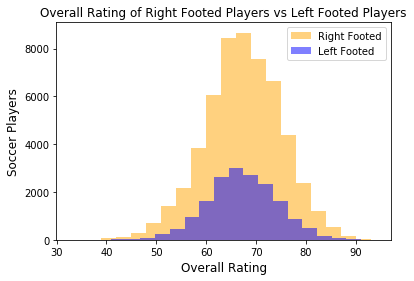

In [5]:
def right_left():
    
    #finding the preferred foot; right or left in column preferred_foot
    right = df.preferred_foot == 'right'
    left = df.preferred_foot == 'left'
    
    #calculate the mean, median, and mode of right footers
    r_mean = df.overall_rating[right].mean()
    r_median = df.overall_rating[right].median()
    r_mode = df.overall_rating[right].mode()
    
    #calculate the mean, median, and mode of left footers
    l_mean = df.overall_rating[left].mean()
    l_median = df.overall_rating[left].median()
    l_mode = df.overall_rating[left].mode()
    
    print('Overall rating mean, median, and mode of right footers...\n')
    print('mean:',float(round(r_mean,2)))
    print('median:',float(round(r_median,2)))
    print('mode:',float(round(r_mode,2)),"\n")
    
    print('Overall rating mean, median, and mode of left footers...\n')
    print('mean:',float(round(l_mean,2)))
    print('median:',float(round(l_median,2)))
    print('mode:',float(round(l_mode,2)),"\n")
    
    
    #calculate the counts of players whom are right footed and left footed along with the percentages of the total
    r_count = df.overall_rating[right].count()
    l_count = df.overall_rating[left].count()
    total = df.overall_rating.count()
    r_per = r_count/total*100
    l_per = l_count/total*100
    
    print('Right foot count and percentage of total...\n')
    print('Count:',r_count)
    print('Percentage:',"{} %\n".format(round(r_per,2)))
    print('Left foot count and percentage of total...\n')
    print('Count:',l_count)
    print('Percentage:',"{} %\n".format(round(l_per,2)))
    
    #histogram showing the distributions of right and left footers overall rating
    df.overall_rating[right].hist(alpha=0.5,bins=20,label='Right Footed',color='orange')
    df.overall_rating[left].hist(alpha=0.5,bins=20,label='Left Footed',color='blue')
    plt.title('Overall Rating of Right Footed Players vs Left Footed Players')
    plt.xlabel('Overall Rating',fontsize=12)
    plt.ylabel('Soccer Players',fontsize=12)
    plt.grid(False)
    plt.legend();
    
    return;

right_left()

### Reason for Analysis

For this analysis, we're comparing the overall rating of left footers to right footers and seeing if one group performs better than the other.

I chose to calculate the average overall rating of left footers and right footers; to see if the ratings average for one group was higher than the other.

In addition, I chose to calculate the counts of left footers and right footers and the percentages of the total; to see the differences between the two groups.

The plot is of a stacked histogram showing the distributions of right footers and left footers.  I chose this distribution because it's easy to visual the mean, median, and mode.  Also, you can see how the counts compare to the two groups. 

### How does age affect the players overall rating?

correlation coefficient between age and overall rating...

[[1.         0.46002369]
 [0.46002369 1.        ]]


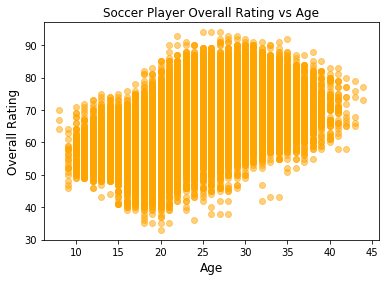

In [6]:
def players_age():
    
    #correlation coefficient between age and overall rating
    x = df.age
    y = df.overall_rating

    cc = np.corrcoef(x, y)

    print('correlation coefficient between age and overall rating...\n')
    print(cc)
    
    #scatter plot showing a moderate positive correlation between age and overall rating
    plt.scatter(x, y, alpha=0.5,color='orange')
    plt.title('Soccer Player Overall Rating vs Age',fontsize=12)
    plt.xlabel('Age',fontsize=12)
    plt.ylabel('Overall Rating',fontsize=12)
    plt.show();
    
    return;

players_age()    

### Reason for Analysis

for this analysis, we're comparing the age of a player to their overall rating. 

I thought the easiest was to see if two variables are correlated is calculate the correlation coefficent between the two.

The plot used in the analysis for the two variables is a scatter plot.  Thought it would be best for two variables and visually it's easier to see the correlation.

### Has the average overall rating of soccer players improved from 2007- 2016?

Average Overall Rating of Players from 2007-2016...

year
2007    63.029867
2008    66.803502
2009    67.125021
2010    67.327233
2011    67.612091
2012    67.700640
2013    67.475578
2014    67.497983
2015    67.964257
2016    69.849043
Name: overall_rating, dtype: float64 

overall rating percentage change from 2007-2016...

Percentage:10.82 %



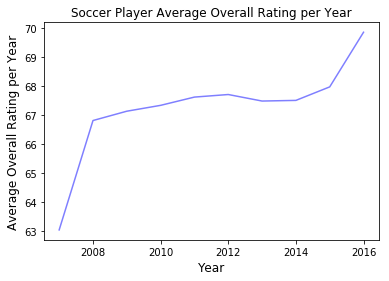

In [7]:
def avg_rating():
    
    #average overall rating per year from 2007-2016
    means = df.groupby('year').mean()['overall_rating']
    
    print('Average Overall Rating of Players from 2007-2016...\n')
    print(means,'\n')
    
    #increase by percentage from 2007-2016
    yr_2016 = df.year == 2016
    yr_2007 = df.year == 2007
    rt_2016 = df.overall_rating[yr_2016].mean()
    rt_2007 = df.overall_rating[yr_2007].mean()
    chg = rt_2016-rt_2007
    per_chg = chg/rt_2007*100
    
    print('overall rating percentage change from 2007-2016...\n')
    print('Percentage:'"{} %\n".format(round(per_chg,2)))
    
    #line plot showing the yearly progression and steady increase of overall rating of soccer players from 2007-2016
    means.plot(kind='line',alpha=0.5,color='blue') 
    plt.title('Soccer Player Average Overall Rating per Year',fontsize=12)
    plt.xlabel('Year',fontsize=12)
    plt.ylabel('Average Overall Rating per Year',fontsize=12)
    plt.show();
    
    return;

avg_rating()

### Reason for Analysis

For this analysis, we're looking at the overall rating average per year.

I chose to calculate the averages from 2007-2016 and the percentage change in that period.

I chose a line chart because it's a good visual for value over a time.

### How many players reached their potential from 2007 - 2016?

Percentage of players that reached their potential...

Exceeded:0.79 %

Achieved:17.22 %

Underachieved:81.99 %



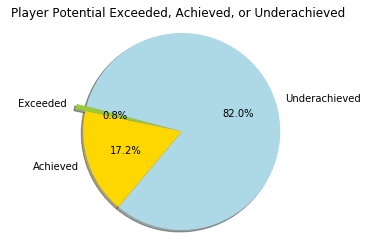

In [8]:
def reached_potential():
    
    #find the count of players exceeded,achieved, and underachieved in the 9 year period
    exceeded = df.overall_rating_potential_diff > 0
    achieved = df.overall_rating_potential_diff == 0
    underachieved = df.overall_rating_potential_diff < 0
    total = df.overall_rating_potential_diff.count()
    
    #calculating the percentage of players exceeding(e), achieving(a), and underachieving(u)
    e = df.year[exceeded].count()/total*100
    a = df.year[achieved].count()/total*100
    u = df.year[underachieved].count()/total*100
    
    print('Percentage of players that reached their potential...\n')
    print('Exceeded:'"{} %\n".format(round(e,2)))
    print('Achieved:'"{} %\n".format(round(a,2)))
    print('Underachieved:'"{} %\n".format(round(u,2)))
    
    #pie chart showing the percentages of players that exceeded, achieved, and underachieved in the 9 year period
    labels = 'Underachieved', 'Exceeded', 'Achieved'
    sizes = [u, e, a]
    color = ['lightblue', 'yellowgreen','gold']
    explode =(0,0.1,0)

    plt.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=230, colors=color)
    plt.axis('equal')
    plt.title('Player Potential Exceeded, Achieved, or Underachieved')
    plt.show();
    
    return;

reached_potential()

### Reason for Analysis

For this analysis; we're looking the counts of players that exceeded, achieved, and failed to achieve their potential.  

I calculated the percentage of each group out of the total.

I chose a pie chart to show the percentages of each group of out of the total.

<a id='conclusions'></a>
## Conclusions

Are Left Footed players better on average than right footers?
>The mean, median, and mode of the overall rating for right and left footers are almost equal at 67 showing no statiscal advantage of being left footed over right.  The count of right footers make about 3/4 quarters of the total, while  left footers make up only a 1/4 of the total, so far less common.  The histogram graphed shows this too as the distributions for both are symmetrical visually showing the equal mean, median, and mode; in addition, the counts for right footers are greater in the graph too.  

How does age affect the players overall rating?
> The correlation coefficient between age and overall rating is .46 indicating a moderate positive relationship.  The scatter plot shows this visual.  There is a moderate correlation, a young player isn't performing at their peak performance and lacking experience, while a aging player doesn't have the same physical attributes they use too.

Has the average overall rating of soccer players improved from 2007- 2016?
> Over the 9 year period; from 2007-2016, the average overall rating of players has increased 10.82%.  The line chart shows the change in value over time.  In 2007 this value was around 63 and in 2016 this value increased to near 70.  The analysis shows a slight trend in player ratings.  

How many players reached their potential from 2007 - 2016?
> From 2007-2016, the percentage of players that excceded potential was very small at .8%; the players that achieved potential 17.2%, and the vast majority of players failed to achieve their potential at 82%.  This could be related to a players skill level, the potential rating was too high, or injuries.  It's hard to determine what's causing the trend exactly; what we can determine is a very small percentage of player exceed potential and a small percentage achieve potential and is probably decent representation of professional players in 1st division leagues across Europe.

## Limitations

Too many skills and no positional data:
> The positional data was missing for the players and most data was mostly centered around lots of skills and how the player rates at that skill.  The data was great for looking up the best dribbler etc, but it didn't necessarily translate to an overall rating.  

Decent representation of 1st Division European Leagues:
> I thought the sample was an effective representation of players in various 1st divisioin leagues across Europe, but it failed to include leagues in the Americas and other 1st division leagues outside Europe

Data cleaning limitations:
> One of issues in the data cleaning process were the null values from the overall_rating, potential, and preferred_foot columns.  I dropped these values, since my analysis focused around these variables and they were null across the rows in each variable. Unfortunitely, I dropped 836 rows, which could have influenced my data.  Another decision I made, was to only include one rating for a single year; the last rating.  I felt it was the most accurate, but may have limited the data, because I dropped the other rows ending with a final sample of 72020 rows and 7 columns. 